In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *
import sklearn

In [64]:
emi_com = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")
temp = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp_trend.csv")


In [65]:
emi_com['Date'] = pd.to_datetime(emi_com['Date'])

In [66]:
emi_com


,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.248083,Distillate Fuel Oil,Petroleum,Residential,22.796,91.888452
1,15083,1973-01-01,0.000977,Petroleum Coke,Petroleum,Electric Power,0.128,131.038037
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.026290,Distillate Fuel Oil,Petroleum,Electric Power,2.397,91.176304
4,13861,1973-01-01,1.236564,Total,Petroleum,Transportation,101.775,82.304707
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.020904,Motor Gasoline,Petroleum,Industrial,1.426,68.215853
22579,9583,2023-11-01,0.059758,Petroleum Coke,Petroleum,Industrial,7.556,126.443984
22580,10194,2023-11-01,0.002934,Residual Fuel Oil,Petroleum,Industrial,0.278,94.762683
22581,11416,2023-11-01,0.433645,Distillate Fuel Oil,Petroleum,Transportation,37.627,86.769056


In [67]:
#if energy class is petrol, delete energy types that are not total 



,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
7,19360,1973-01-01,0.010010,Coal,Coal,Residential,1.142,114.087500
17,20786,1973-01-01,0.151120,Coal,Coal,Industrial,33.480,221.545564
22,21385,1973-01-01,0.000000,Coal,Coal,Transportation,0.000,NaN
26,21984,1973-01-01,0.663980,Coal,Coal,Electric Power,73.112,110.111808
...,...,...,...,...,...,...,...,...
22553,14471,2023-11-01,1.991292,Total,Petroleum,Transportation,146.444,73.542186
22561,1832,2023-11-01,0.099089,Total,Petroleum,Residential,6.246,63.034419
22569,5306,2023-11-01,0.080477,Total,Petroleum,Commercial,5.469,67.956895
22571,7138,2023-11-01,0.461447,Total,Petroleum,Industrial,30.972,67.119335


/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_81354/3745996017.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Emission (Mton Co2)',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Emission (Mton Co2)'>

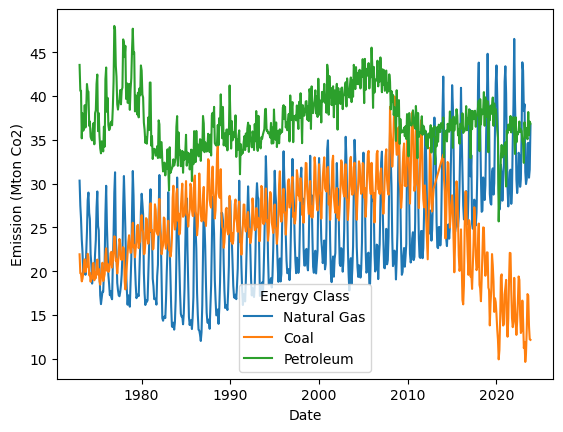

In [78]:
sns.lineplot(data=emi_com,x='Date',y='Emission (Mton Co2)',hue='Energy Class',ci=None)

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_81354/3143046636.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Consumption (quadrillion Btu)',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Consumption (quadrillion Btu)'>

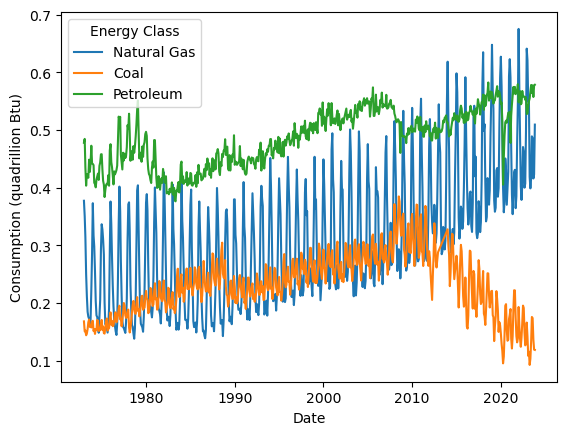

In [79]:
sns.lineplot(data=emi_com,x='Date',y='Consumption (quadrillion Btu)',hue='Energy Class',ci=None)

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_81354/3762310563.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=emi_com,x='Date',y='Emission per Consumption',hue='Energy Class',ci=None)


<Axes: xlabel='Date', ylabel='Emission per Consumption'>

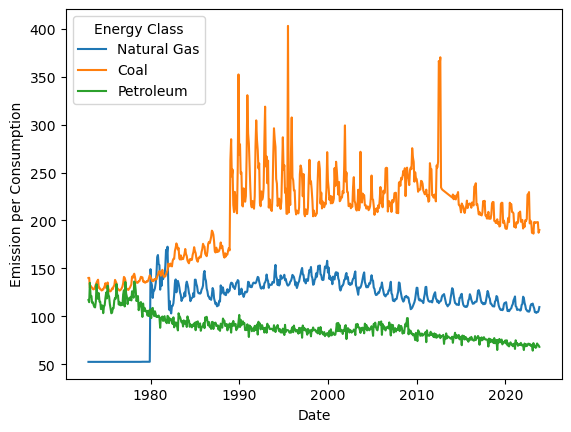

In [80]:
sns.lineplot(data=emi_com,x='Date',y='Emission per Consumption',hue='Energy Class',ci=None)

In [15]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.248083,Distillate Fuel Oil,Petroleum,Residential,22.796,91.888452
1,15083,1973-01-01,0.000977,Petroleum Coke,Petroleum,Electric Power,0.128,131.038037
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.026290,Distillate Fuel Oil,Petroleum,Electric Power,2.397,91.176304
4,13861,1973-01-01,1.236564,Total,Petroleum,Transportation,101.775,82.304707
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.020904,Motor Gasoline,Petroleum,Industrial,1.426,68.215853
22579,9583,2023-11-01,0.059758,Petroleum Coke,Petroleum,Industrial,7.556,126.443984
22580,10194,2023-11-01,0.002934,Residual Fuel Oil,Petroleum,Industrial,0.278,94.762683
22581,11416,2023-11-01,0.433645,Distillate Fuel Oil,Petroleum,Transportation,37.627,86.769056


In [16]:
# Cleaning oil data every time code: 

emi_com['Date'] = pd.to_datetime(emi_com['Date'])



In [17]:
temp.drop('Unnamed: 0', axis=1, inplace=True)
temp.rename(columns={'date': 'Date'}, inplace=True) 
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
#temp = temp[temp.index.year >= 1973]
temp['anomaly_squared'] = temp['anomaly'] ** 2



In [18]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 1850-07-01 to 2015-11-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anomaly          1985 non-null   float64
 1   anomaly_squared  1985 non-null   float64
dtypes: float64(2)
memory usage: 46.5 KB


In [19]:
temp.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
temp

,anomaly,anomaly_squared
Date,,
1850-07-01,-0.721250,0.520202
1850-08-01,-0.685167,0.469453
1850-09-01,-0.595417,0.354521
1850-10-01,-0.455875,0.207822
1850-11-01,-0.310667,0.096514
...,...,...
2015-07-01,1.553917,2.414657
2015-08-01,1.714125,2.938225
2015-09-01,1.904042,3.625375


In [20]:
emi_com.drop(['Unnamed: 0'],axis=1,inplace=True)

In [21]:
emi_com

,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,0.248083,Distillate Fuel Oil,Petroleum,Residential,22.796,91.888452
1,1973-01-01,0.000977,Petroleum Coke,Petroleum,Electric Power,0.128,131.038037
2,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,1973-01-01,0.026290,Distillate Fuel Oil,Petroleum,Electric Power,2.397,91.176304
4,1973-01-01,1.236564,Total,Petroleum,Transportation,101.775,82.304707
...,...,...,...,...,...,...,...
22578,2023-11-01,0.020904,Motor Gasoline,Petroleum,Industrial,1.426,68.215853
22579,2023-11-01,0.059758,Petroleum Coke,Petroleum,Industrial,7.556,126.443984
22580,2023-11-01,0.002934,Residual Fuel Oil,Petroleum,Industrial,0.278,94.762683
22581,2023-11-01,0.433645,Distillate Fuel Oil,Petroleum,Transportation,37.627,86.769056


In [22]:
df = pd.merge(temp, emi_com, on='Date', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Type                    22583 non-null  object        
 5   Energy Class                   22583 non-null  object        
 6   Sector                         22583 non-null  object        
 7   Emission (Mton Co2)            22583 non-null  float64       
 8   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.7+ MB


In [23]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.020904,Motor Gasoline,Petroleum,Industrial,1.426,68.215853
24049,2023-11-01,NaN,NaN,0.059758,Petroleum Coke,Petroleum,Industrial,7.556,126.443984
24050,2023-11-01,NaN,NaN,0.002934,Residual Fuel Oil,Petroleum,Industrial,0.278,94.762683
24051,2023-11-01,NaN,NaN,0.433645,Distillate Fuel Oil,Petroleum,Transportation,37.627,86.769056


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Type                    22583 non-null  object        
 5   Energy Class                   22583 non-null  object        
 6   Sector                         22583 non-null  object        
 7   Emission (Mton Co2)            22583 non-null  float64       
 8   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.7+ MB


In [25]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [26]:
df.drop(['Energy Type'], axis =1, inplace=True)

In [27]:
df.drop(['Sector'], axis =1, inplace=True)

<Axes: xlabel='anomaly', ylabel='Emission per Consumption'>

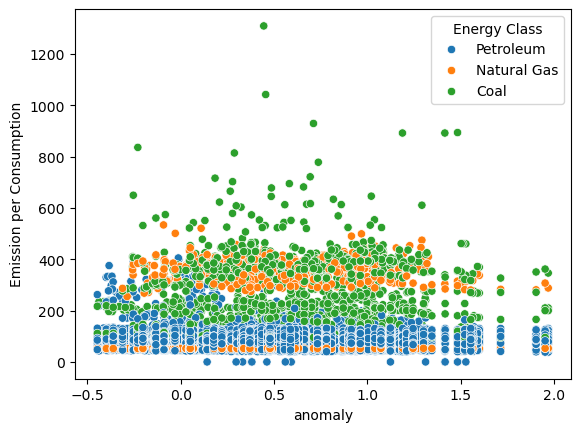

In [28]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly"], hue=df['Energy Class'])

<Axes: xlabel='anomaly_squared', ylabel='Emission per Consumption'>

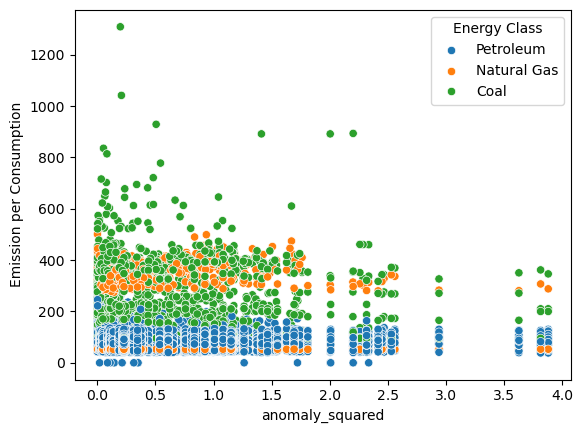

In [29]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly_squared"], hue=df['Energy Class'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Class                   22583 non-null  object        
 5   Emission (Mton Co2)            22583 non-null  float64       
 6   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


In [31]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.020904,Petroleum,1.426,68.215853
24049,2023-11-01,NaN,NaN,0.059758,Petroleum,7.556,126.443984
24050,2023-11-01,NaN,NaN,0.002934,Petroleum,0.278,94.762683
24051,2023-11-01,NaN,NaN,0.433645,Petroleum,37.627,86.769056


<Axes: >

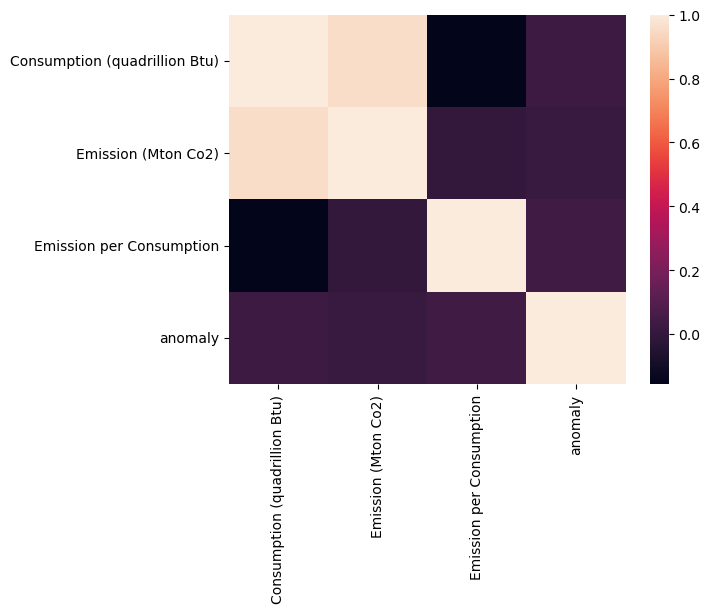

In [47]:
sns.heatmap(df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emission per Consumption',	'anomaly']].corr(method='pearson'))

<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

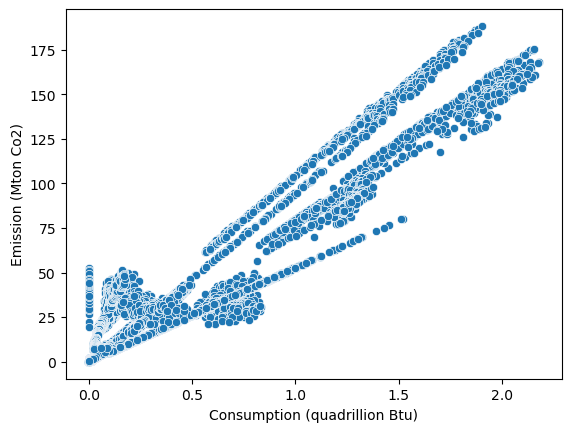

In [34]:
sns.scatterplot(x=df['Consumption (quadrillion Btu)'],y=df['Emission (Mton Co2)'])

<Axes: xlabel='Date'>

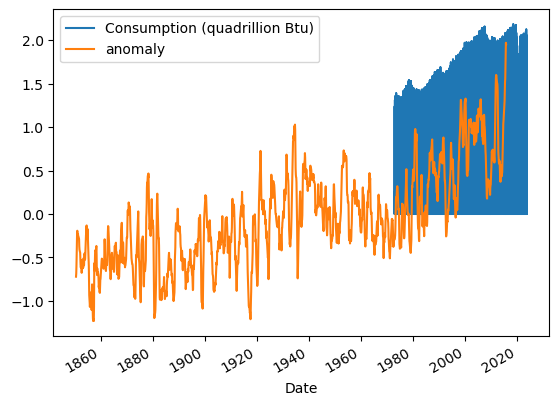

In [35]:
df.plot(x='Date',y=['Consumption (quadrillion Btu)','anomaly'])
# cosumption causes anomaly 

In [41]:
temp.reset_index(inplace=True)

In [42]:
temp['Date'] = pd.to_datetime(temp['Date'])

NameError: name 'finall_df' is not defined

NameError: name 'final_df' is not defined

In [60]:
from numpy import log
final_df['anomaly'] = log(final_df['anomaly'])
final_df['anomaly_squared'] = log(final_df['anomaly_squared'])
final_df['Consumption (quadrillion Btu)'] = log(final_df['Consumption (quadrillion Btu)'])
final_df['Emission (Mton Co2)'] = log(final_df['Emission (Mton Co2)'])
final_df['Emission per Consumption'] = log(final_df['Emission per Consumption'])

/Users/ishitajain/anaconda3/envs/env311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ishitajain/anaconda3/envs/env311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
final_df = final_df[np.isfinite(final_df).all(1)]

In [66]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(final_df['Consumption (quadrillion Btu)'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -14.334543
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


<Axes: xlabel='Date', ylabel='anomaly'>

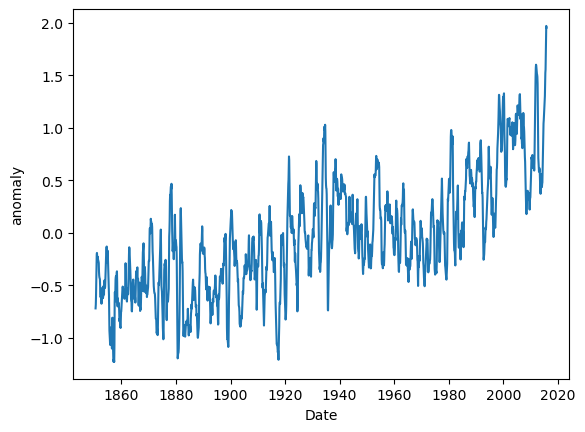

In [48]:
final_df = df.drop(['Energy Class'],axis=1)

In [49]:
df
final_df = final_df[np.isfinite(final_df).all(1)]



In [48]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption,lag_25,lag_26,lag_27,...,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.020904,Petroleum,1.426,68.215853,1.991292,0.044521,0.002148,...,0.000550,0.026459,0.231739,0.002871,0.019947,0.000000,0.000000,0.004320,0.030465,0.068966
24049,2023-11-01,NaN,NaN,0.059758,Petroleum,7.556,126.443984,0.171361,1.991292,0.044521,...,0.000179,0.000550,0.026459,0.231739,0.002871,0.019947,0.000000,0.000000,0.004320,0.030465
24050,2023-11-01,NaN,NaN,0.002934,Petroleum,0.278,94.762683,0.235089,0.171361,1.991292,...,0.065856,0.000179,0.000550,0.026459,0.231739,0.002871,0.019947,0.000000,0.000000,0.004320
24051,2023-11-01,NaN,NaN,0.433645,Petroleum,37.627,86.769056,0.004076,0.235089,0.171361,...,0.997830,0.065856,0.000179,0.000550,0.026459,0.231739,0.002871,0.019947,0.000000,0.000000


<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

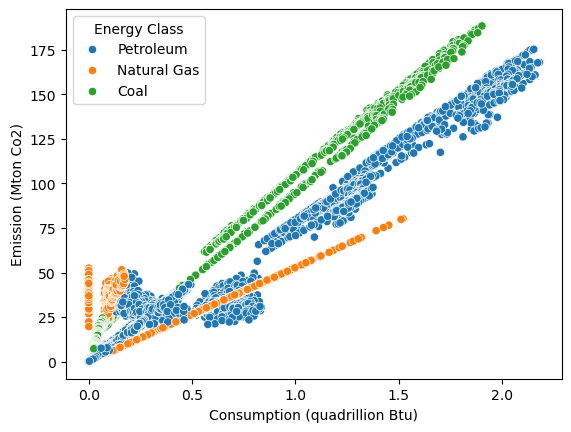

In [55]:
sns.scatterplot
sns.scatterplot(y=emi_com['Emission (Mton Co2)'],x=emi_com['Consumption (quadrillion Btu)'], hue=emi_com['Energy Class'])

In [24]:
temp.reset_index(inplace=True)

In [25]:
temp.drop(['index'],axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [45]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.020904,Petroleum,1.426,68.215853
24049,2023-11-01,NaN,NaN,0.059758,Petroleum,7.556,126.443984
24050,2023-11-01,NaN,NaN,0.002934,Petroleum,0.278,94.762683
24051,2023-11-01,NaN,NaN,0.433645,Petroleum,37.627,86.769056


<class 'pandas.core.frame.DataFrame'>
Index: 22558 entries, 1495 to 24052
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lag_25               22558 non-null  float64
 1   Emission (Mton Co2)  22558 non-null  float64
dtypes: float64(2)
memory usage: 528.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 22557 entries, 1496 to 24052
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lag_26               22557 non-null  float64
 1   Emission (Mton Co2)  22557 non-null  float64
dtypes: float64(2)
memory usage: 528.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 22556 entries, 1497 to 24052
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lag_27               22556 non-null  float64
 1   Emission (Mton Co2)  22556 non-null  float6

<Axes: >

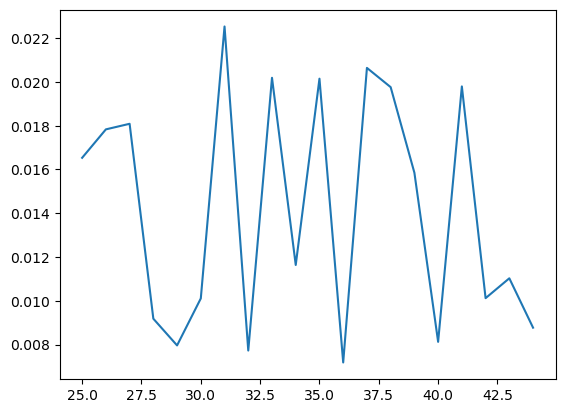

In [46]:
from sklearn.feature_selection import mutual_info_regression 

#  to shift by two month intervals and create columns with lags

for x in range(25,45):

    df['lag_'+str(x)] = df['Consumption (quadrillion Btu)'].shift(x)

# to find the mutual information information between two variables. Chengyi, if you use this make sure to look at the assumptions of this. 
    
lag_mut_info = {}

for i in range(25,45):
    lg = 'lag_'+str(i)
    x = df[[lg,'Emission (Mton Co2)']]
    x = x[np.isfinite(x).all(1)]
    x.dropna(inplace=True)
    x.info()


    mutual_info = mutual_info_regression(x.drop(['Emission (Mton Co2)'],axis=1),x['Emission (Mton Co2)'])
    lag_mut_info[i] = mutual_info[0]
# to find where the ideal lag is 
ideal_lag = 0 
max  = 0 
for i in lag_mut_info:
    if lag_mut_info[i] > max:
        max = lag_mut_info[i]
        ideal_lag = i
print(ideal_lag,max)

sns.lineplot(lag_mut_info)


#verdict is that 38 months is the best lag for how much to shift anomaly temp for emi/consumption
# 20 month lag for shifting emission to correlate with temp 
# 19 month lag for shifting 


19


<Axes: >

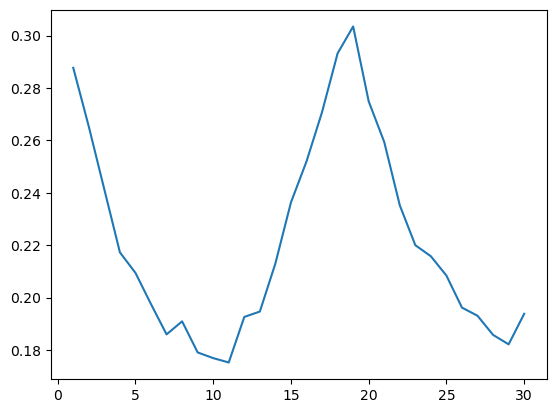

In [135]:
np.all(np.isfinite(x['Emission per Consumption']))

False

In [ ]:
x

0      Date                             1973-07-01 00:00:00
       index                                              6
       anomaly                                     0.179917
       anomaly_squared                              0.03237
       Consumption (quadrillion Btu)               0.517148
                                               ...         
18814  anomaly_squared                             3.812094
       Consumption (quadrillion Btu)               0.000057
       Energy Class                               Petroleum
       Emission (Mton Co2)                            0.002
       Emission per Consumption                   34.874941
Length: 150520, dtype: object

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

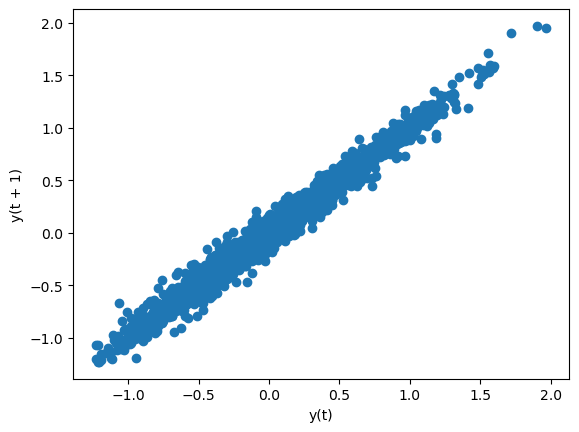

In [86]:
pd.plotting.lag_plot(temp['anomaly'], lag=1)

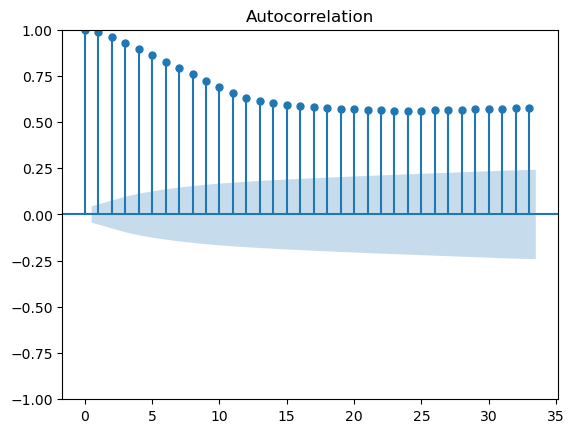

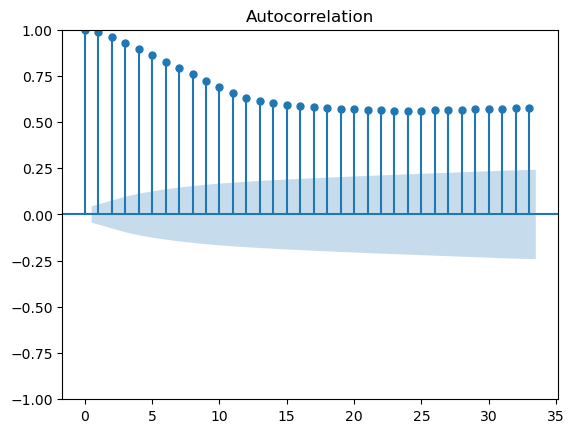

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp['anomaly'])

In [89]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,15083,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,13861,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,9583,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,10194,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,11416,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


<Axes: xlabel='y(t)', ylabel='y(t + 20)'>

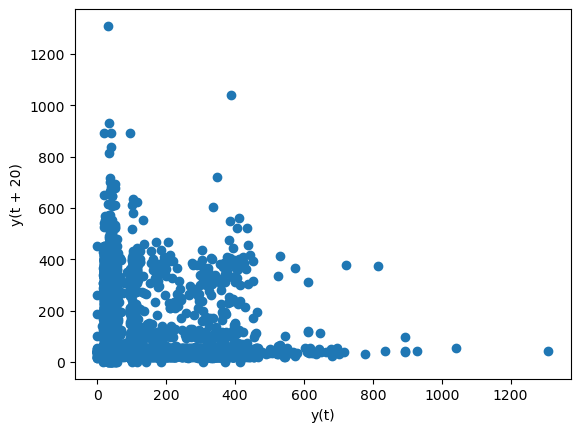

In [94]:
pd.plotting.lag_plot(emi_com['Emission per Consumption'], lag=20)

In [91]:
# exponential time series 
final_df['Emission per Consumption']

In [68]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(final_df[[ 'Emission per Consumption','anomaly']], maxlag=38)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2745  , p=0.2590  , df_denom=6845, df_num=1
ssr based chi2 test:   chi2=1.2750  , p=0.2588  , df=1
likelihood ratio test: chi2=1.2749  , p=0.2588  , df=1
parameter F test:         F=1.2745  , p=0.2590  , df_denom=6845, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7342  , p=0.0650  , df_denom=6842, df_num=2
ssr based chi2 test:   chi2=5.4725  , p=0.0648  , df=2
likelihood ratio test: chi2=5.4703  , p=0.0649  , df=2
parameter F test:         F=2.7342  , p=0.0650  , df_denom=6842, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8368  , p=0.1381  , df_denom=6839, df_num=3
ssr based chi2 test:   chi2=5.5160  , p=0.1377  , df=3
likelihood ratio test: chi2=5.5138  , p=0.1378  , df=3
parameter F test:         F=1.8368  , p=0.1381  , df_denom=6839, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4630  , p=0.

{1: ({'ssr_ftest': (1.2744654039141783, 0.2589702044598728, 6845.0, 1),
   'ssr_chi2test': (1.2750239716587717, 0.2588262978202016, 1),
   'lrtest': (1.2749052885137644, 0.2588484642113342, 1),
   'params_ftest': (1.2744654039152772, 0.2589702044598068, 6845.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.734249329055279, 0.06501370205095483, 6842.0, 2),
   'ssr_chi2test': (5.472494930149516, 0.06481310456848127, 2),
   'lrtest': (5.470309136890137, 0.0648839773132615, 2),
   'params_ftest': (2.734249329053311, 0.06501370205107845, 6842.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.8367782145838827, 0.13812999864796321, 6839.0, 3),
   'ssr_chi2test': (5.515974699681793, 0.13768626937770828, 3),
   'lrtest': (5.513753720755631, 0.1378183029523248, 3),
   'params_ftest': (1.8367782145851328, 0.13812999864775774, 6839.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.